# Exploratory Data Analysis
1.Distribution of Male and Female - 
    Bar chart
    Pie chart
2. What Distribution of size of all Images
    Histogram
    Box plot
    split by 'Gender'
3. Make the decision of width & height to resize using abovw chart
4. remove the few images that are having very less size

In [1]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\rohithy\anaconda3\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from glob import glob

In [3]:
#extract path of male and female in crop_folder and put them in a list
fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis = 0)

In [4]:
df.tail()

,filepath,gender
2311,./crop_data/male\male_994.jpg,male
2312,./crop_data/male\male_996.jpg,male
2313,./crop_data/male\male_997.jpg,male
2314,./crop_data/male\male_998.jpg,male
2315,./crop_data/male\male_999.jpg,male


In [5]:
def get_width(path):
    img = cv2.imread(path)
    return img.shape[0]

In [6]:
#image is a sqaure matrix so width is same as the height
df['dimension'] = df['filepath'].apply(get_width)

In [7]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\female_0.jpg,female,273
1,./crop_data/female\female_1.jpg,female,182
2,./crop_data/female\female_100.jpg,female,122
3,./crop_data/female\female_1002.jpg,female,122
4,./crop_data/female\female_1005.jpg,female,182


In [23]:
df.shape

(5020, 3)

In [8]:
dist_gender = df['gender'].value_counts()
dist_gender

female    2704
male      2316
Name: gender, dtype: int64

C:\Users\rohithy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


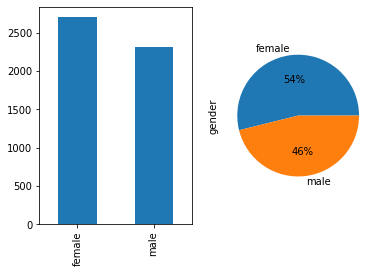

In [9]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1],autopct='%0.0f%%')
plt.show()

<AxesSubplot:xlabel='dimension', ylabel='Count'>

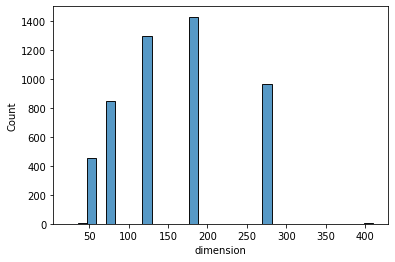

In [12]:
sns.histplot(df['dimension'])

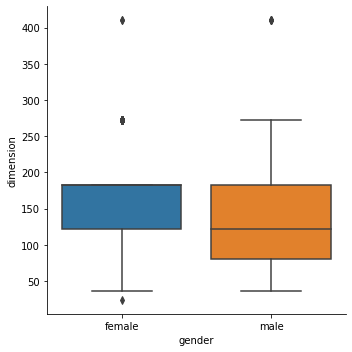

In [14]:
sns.catplot(data=df,x='gender',y='dimension',kind='box')

### we have almost equal distribution of gender in terms of numbers
### most of the images are having dimensions more than 60
### Female most of the female images are HD compare to male images

### consider the images with dimesnions more than 60
### resize all the images into 100x100

In [24]:
df_filter = df.query('dimension > 60')
df_filter.shape

df_filter = df.copy(deep=True)
df_filter = df_filter[df_filter['dimension']>60]

df2 = df[['A']].copy(deep=True)
df2['A'] /= 2

(4558, 3)

In [39]:
df_filter = df.copy(deep=True)
df_filter = df_filter[df_filter['dimension']>60]

In [40]:
df_filter['gender'].value_counts(normalize = True)

female    0.543221
male      0.456779
Name: gender, dtype: float64

# Structure the image
- 100 x 100

In [48]:
def structuring(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        size = gray.shape[0]
        if size >= 100:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        #flatten image (1x10,000) - better to store in df as 1 row and 10k columns

        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
         return None

In [49]:
df_filter['data'] = df_filter['filepath'].apply(structuring)


In [50]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\female_0.jpg,female,273,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,./crop_data/female\female_1.jpg,female,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./crop_data/female\female_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\female_1002.jpg,female,122,"[132, 121, 118, 97, 85, 92, 91, 110, 155, 162,..."
4,./crop_data/female\female_1005.jpg,female,182,"[234, 234, 234, 228, 231, 205, 122, 98, 74, 54..."


In [52]:
data = df_filter['data'].apply(pd.Series)

In [61]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,female
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,female


In [55]:
data.columns = [f'pixel_{i}' for i in data.columns]

In [57]:
### Data Normalisation

In [58]:
data = data/255.0

In [60]:
data['gender'] = df_filter['gender']

In [63]:
data.isnull().sum().sum()

0

In [64]:
data.dropna(inplace = True)

In [65]:
import pickle

In [66]:
pickle.dump(data,open('./data/data_image_100_100.pickle',mode='wb'))